🎯 Độ chính xác: 0.93


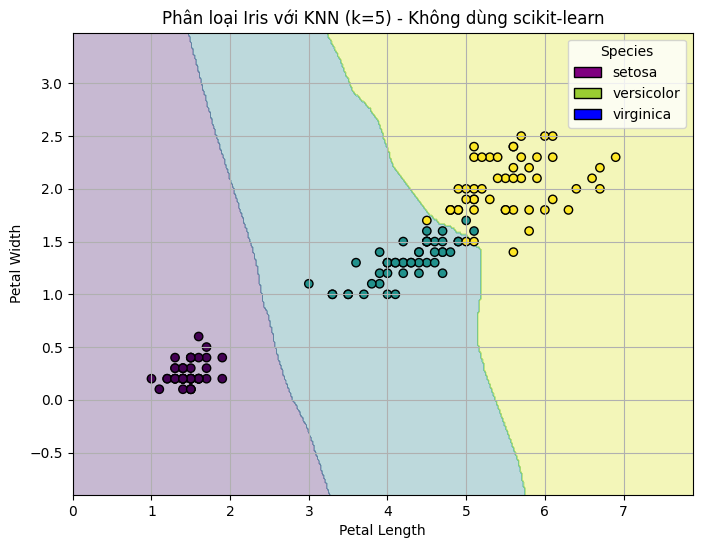

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.patches import Patch

# 1. Đọc dữ liệu
df = pd.read_csv('iris.csv')

# 2. Chọn 2 đặc trưng để trực quan (petal_length, petal_width)
X = df[['petal_length', 'petal_width']].values
y_text = df['species'].values

# 3. Mã hóa nhãn thành số thủ công
labels_text = np.unique(y_text)
label_to_num = {label: i for i, label in enumerate(labels_text)}
num_to_label = {i: label for label, i in label_to_num.items()}
y = np.array([label_to_num[label] for label in y_text])

# 4. Chia dữ liệu thành train và test (80% - 20%)
np.random.seed(0)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# 5. Định nghĩa thuật toán KNN đơn giản
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def predict_knn(X_train, y_train, x_test, k=5):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# 6. Dự đoán nhãn cho tập test
k = 5
y_pred = np.array([predict_knn(X_train, y_train, x, k) for x in X_test])

# 7. Tính độ chính xác
accuracy = np.mean(y_pred == y_test)
print(f"🎯 Độ chính xác: {accuracy:.2f}")


# =============================
# 📈 Trực quan hóa vùng phân loại (cho 2 đặc trưng)
# =============================

# Huấn luyện toàn bộ tập với 2 đặc trưng
def predict_grid(X_train, y_train, grid_points, k=5):
    predictions = []
    for x in grid_points:
        pred = predict_knn(X_train, y_train, x, k)
        predictions.append(pred)
    return np.array(predictions)

# Tạo lưới để vẽ vùng phân loại
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict_grid(X_train, y_train, grid_points, k)
Z = Z.reshape(xx.shape)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')

# Tạo legend thủ công
colors = ['purple', 'yellowgreen', 'blue']
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', label=label) for i, label in enumerate(labels_text)]
plt.legend(handles=legend_elements, title='Species')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f'Phân loại Iris với KNN (k={k}) - Không dùng scikit-learn')
plt.grid(True)
plt.show()
